In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Part 1

In [1]:
def calc_load_column(col):
    total_load = len(col)
    cur_load = total_load
    load = 0
    for idx, char in enumerate(col):
        if char == 'O':
            load += cur_load
            cur_load -=1
        if char == '#':
            cur_load = total_load - (idx+1)
    return  load
            

In [5]:
def do_part_one(file_path):
    with open(file_path,'r') as f:
        platform=[l.strip() for l in f.readlines()]
        
    load=0
    for c in range(len(platform[0])):
        col = [ r[c] for r in platform]
        load += calc_load_column(col)
        
    return load

In [7]:
%%time
do_part_one('input_data/day_14.txt')

CPU times: user 2.37 ms, sys: 1.21 ms, total: 3.59 ms
Wall time: 3.07 ms


113525

In [10]:
test[3:]

''

# Part 2

In [20]:
def tilt_row(col):
    rocks ={}
    blank = ['.']*len(col)
    
    rock_idx = 0
    
    for idx, char in enumerate(col):
        if char == 'O':
            try:
                rocks[rock_idx] +=1
            except:
                rocks[rock_idx] =1
        if char == '#':
            blank[idx] = '#'
            rock_idx=idx+1
            
    for start,nrock in rocks.items():
        for i in range(nrock):
            idx=start+i
            blank[idx] ='O'
            
    return  list(blank)

def execute_cycle(rock_grid):
    ## North Tilt
    for c in range(len(rock_grid[0])):
        col = [ r[c] for r in rock_grid]
        new_col = tilt_row(col)
        for r in range(len(rock_grid)):
            rock_grid[r][c] = new_col[r]
            
    ## West Tilt
    for r, row in enumerate(rock_grid):
        new_row = tilt_row(row)
        for c,char in enumerate(new_row):
            rock_grid[r][c] = char

    ## South Tilt
    for c in range(len(rock_grid[0])):
        col = [ r[c] for r in rock_grid]
        col.reverse()
        new_col = tilt_row(col)
        new_col.reverse()
        for r in range(len(rock_grid)):
            rock_grid[r][c] = new_col[r]
    
            
    ## East Tilt
    for r, row in enumerate(rock_grid):
        row.reverse()
        new_row = tilt_row(row)
        new_row.reverse()
        for c,char in enumerate(new_row):
            rock_grid[r][c] = char
    return rock_grid

In [77]:
def calculate_load(platform):
    load=0
    total = len(platform)
    for i,row in enumerate(platform):
        load += sum([ x=='O' for x in row])*total
        total -=1
    return load

In [153]:
def do_part_two(file_path):
    with open(file_path,'r') as f:
        platform=[list(l.strip()) for l in f.readlines()]
        
    mixes={}
    loads =[]
    key=None
    for i in range (1000000):
        platform = execute_cycle(platform)
        key = ''.join([ ''.join(row) for row in platform])
        l = calculate_load(platform)
        loads.append(l)
        try :
            mixes[key].append(i)
        except:
            mixes[key] =[i]
        if len(mixes[key]) > 1:
            break
            
    steps = mixes[key]
    cycle = steps[1]-steps[0]
    
    steps_left = (1000000000 - (steps[0]))%cycle
    
    print(loads[steps[0]+steps_left-1], cycle)
    
    
    
    return  mixes,loads

In [154]:
%%time
mix, tmp = do_part_two('input_data/day_14.txt')

101292 84
CPU times: user 826 ms, sys: 3.41 ms, total: 830 ms
Wall time: 838 ms


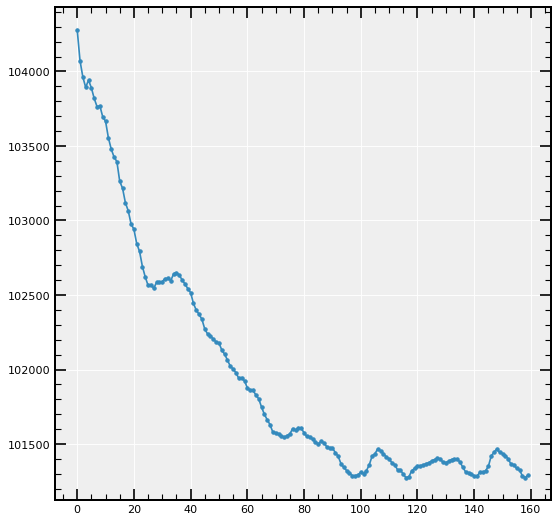

In [130]:
import matplotlib.pyplot as plt
plt.style.use('lucas')

plt.plot(tmp[:160], marker='.')